# Dimensionality reduction 1
## PCA and SVD
    Linear dimensionality reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Principal Component Analysis
- Linear dimensionality reduction method
- Find optimal orthogonal transformation such that covariance between the new dimensions is 0
    - Exploits eigen decomposition
    - By the orthogonal transformation, we could ignore the low variance direction to reduce the dimensionality of the features.
- Transformations
    - Find the basis (eigen vector of covariance matrix) such that independent each other
    - Diagonalization by changing the basis (inner-product of the original matrix and basis (new coordinate system)) 
    $
    \mathbf{X} \text{: Data original coordinates}
    \\
    \hat{\mathbf{X}} \text{: Centralized dataset}
    \\
    \mathbf{\Gamma} \text{: New coordinate system (Eigen vectors matrix)}
    \\
    \mathbf{\Lambda} \text{: Variance of respective direction (Eigen values matrix)}
    \\
    $$
    Eigen Decomposition of covariance matrix of original data
    $$
    \Sigma_{\hat{\mathbf{X}}} =  \mathbf{\Gamma} \mathbf{\Lambda} \mathbf{\Gamma}^T
    $
    
        New coordinate system
    $$\mathbf{\Gamma}$$

        Variance of each direction
        Covariance matrix on the new coordinate
    $$\mathbf{\Lambda}$$
    $$

# PCA
### Process of principal component analysis
Given input
Args
$\mathbf{X} \text{: array, shape[N, D]}$
- N : #samples, D : features dimensions

1. Calculate the mean over samples
$$\mathbf{x_m} \text{: array, shape [D, 1]}$$

2. Centralized (Standardized) the given data matrix around the mean $\mathbf{x_m}$
$$\hat{\mathbf{X}} = X - x_m[\text{none}, :]$$
$$\text{or}$$
$$\hat{\mathbf{X}} = X -  1_N@x_m^T$$

3. Calculate the covariance matrix of the centralized data matrix 
$$\Sigma_{\hat{\mathbf{X}}} = \frac{1}{N}\hat{\mathbf{X}}^T\hat{\mathbf{X}}$$

4. Eigendecomposition
   - Derived the eigen values and eigenvectos of $\Sigma_{\hat{\mathbf{X}}}$ 
$$
\Sigma_{\hat{\mathbf{X}}} = \mathbf{\Gamma}\mathbf{\Lambda}\mathbf{\Gamma^T}
$$

   - $\mathbf{\Gamma}$ : Eigenvector matrix, shape[D, D]
     - Orthonormal matrix
       - All rows are independent with each other.
   - $\mathbf{\Lambda}$ : Eigenvalue matrix, dig(1, .... , D)
     - variance of each direction
     - none-covariance between the direction
     - Directions (new coordinate systems) are independent with each other

5. Plot the original data $\mathbf{X}$ and the eigenvectors to a single diagram
   - To obtain optimal diagonal transformation system onto M-dim space
   - We need to prune the eigenvectors' matrix leaving out only corresponding M the largest eigenvalues
   - We could obtain the 
   - $\mathbf{\Gamma_{prune}}$: some columns are zero


6. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis (project the vectors in $\mathbf{X}$ onto the M-dim subspace).

    Transformed dataset
$$\mathbf{Y}=\mathbf{X}\mathbf{\Gamma}$$
    Covariance matrix of transformed dataset
$$\mathbf{\Sigma_\mathbf{Y}}=\mathbf{\Lambda}=\mathbf{\Gamma}^T{\mathbf{\Sigma_{\hat{\mathbf{X}}}}}\mathbf{\Gamma}$$

The given data X

In [2]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

N, D = X.shape[0], X.shape[1]

print(f"shape: {X.shape}")
print(f"sample: {N}")
print(f"features: {D}")

for idx, x in enumerate(X):
    print(f'    {x}')

shape: (17, 2)
sample: 17
features: 2
    [-3 -2]
    [-2 -1]
    [-1  0]
    [0 1]
    [1 2]
    [2 3]
    [-2 -2]
    [-1 -1]
    [0 0]
    [1 1]
    [2 2]
    [-2 -3]
    [-1 -2]
    [ 0 -1]
    [1 0]
    [2 1]
    [3 2]


1. Calculate the mean over samples
$$\mathbf{x_m} \text{: array, shape [D, 1]}$$

In [3]:
# Axis = over which axis we take mean
# Keepdims(False) for the subsequent operation
# To use augumentation in the following operation, 
# we should squeeze the dimension of the derived mean of data vectors over samples
x_m = X.mean(0, keepdims=False)
print(x_m)
print(f"shape: {x_m.shape}")

[0. 0.]
shape: (2,)


2. Centralized (Standardized) the given data matrix around the mean $\mathbf{x_m}$
$$\hat{\mathbf{X}} = X - x_m[None, :]$$
$$\text{or}$$
$$\hat{\mathbf{X}} = X - x_m^T 1_N$$

In [4]:
X_hat = X - x_m[None, :]
## alternative
# rx_m = X.mean(0, keepdims=True)
# one_n = np.ones((N, 1))
# print(f"1_N shape: {one_n.shape}")
# X_hat = X - one_n @ rx_m
print(X_hat)
print(f"shape: {X_hat.shape}")

[[-3. -2.]
 [-2. -1.]
 [-1.  0.]
 [ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]
 [-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [-2. -3.]
 [-1. -2.]
 [ 0. -1.]
 [ 1.  0.]
 [ 2.  1.]
 [ 3.  2.]]
shape: (17, 2)


3. Calculate the covariance matrix of the centralized data matrix 
$$\Sigma_{\hat{\mathbf{X}}} = \frac{1}{N}\hat{\mathbf{X^T}}\hat{\mathbf{X}}$$

In [5]:
C_X = X_hat.transpose() @ X_hat
C_X = C_X * (1/N)
# print(C_X)
print(f"shape: {C_X.shape}")

shape: (2, 2)


# Function to get covariance matrix

In [6]:
def get_covariance(X):
    """
    Args:
        X: array[N, D]
        data matrix including each data vectors on original space (Usually, Cartesian Space)
    Return:
        C_X: array[N, N]
        covariance matrix of the centralized data of given data matrix X
    """

    # taking mean over samples
    # x_m: array(D)

    x_m = X.mean(0, keepdims=False)
    
    # Centralized X
    # X_hat: array[N, D], dtype=Float

    X_hat = X - x_m[None, :]

    # Calculating the covariance matrix of the centralized data X_hat
    # C_X: array[N, N], dtype=Float

    C_X = X_hat.transpose() @ X_hat
    # Normalization
    C_X *= (1/N)

    return C_X

4. Eigendecomposition
   - Derived the eigen values and eigenvectos of $\Sigma_{\hat{\mathbf{X}}}$ 
$$
\Sigma_{\hat{\mathbf{X}}} = \mathbf{\Gamma}\mathbf{\Lambda}\mathbf{\Gamma^T}
$$

   - $\mathbf{\Gamma}$ : Eigenvector matrix, shape[D, D]
     - Orthonormal matrix
       - All rows are independent with each other.
   - $\mathbf{\Lambda}$ : Eigenvalue matrix, dig(1, .... , D)
     - variance of each direction
     - none-covariance between the direction
     - Directions (new coordinate systems) are independent with each other

Using Numpy eigendecomposition function
- numpy.linalg.eig function

In [7]:
eig_values, eig_vectors = np.linalg.eig(C_X)
print(f"Gamma:{eig_vectors.shape}\n {eig_vectors}")
print(f"Lammda:{eig_values.shape}\n {eig_values}")
max_dim = np.argmax(eig_values)
print(max_dim)

Gamma:(2, 2)
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Lammda:(2,)
 [5.29411765 0.35294118]
0


In [8]:
I = np.eye(len(eig_values))
print(I.shape)

_dig_eig_values = I * eig_values
print(f"diagonal mat\n {_dig_eig_values}")

(2, 2)
diagonal mat
 [[5.29411765 0.        ]
 [0.         0.35294118]]


In [9]:
def get_eigen(Cov_x):
    """
    Args (1):
        Cov_x : array[D, D]
            Covariance matrix of the standardized given data matrix X
    
    Returns (2):
        g : array[D, D]
            eigen_vectors matrix
        
        l : array[D, D]
            eigen_values diagonal matrix
    """

    D = Cov_x.shape[0]

    l, g = np.linalg.eig(Cov_x)
    I = np.eye(D)
    l = I * l[None, :]

    return g, l


5. Plot the original data $\mathbf{X}$ and the eigenvectors to a single diagram
   - To obtain optimal diagonal transformation system onto M-dim space
   - We need to prune the eigenvectors' matrix leaving out only corresponding M the largest eigenvalues
   - We could obtain the 
   - $\mathbf{\Gamma_{prune}}$: some columns are zero

(-3.3, 3.3, -3.3, 3.3)

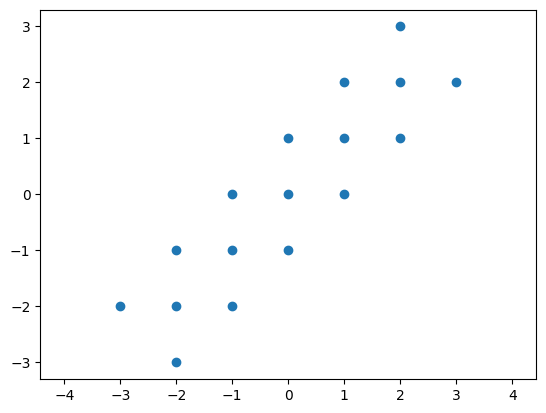

In [10]:
# plot given data
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

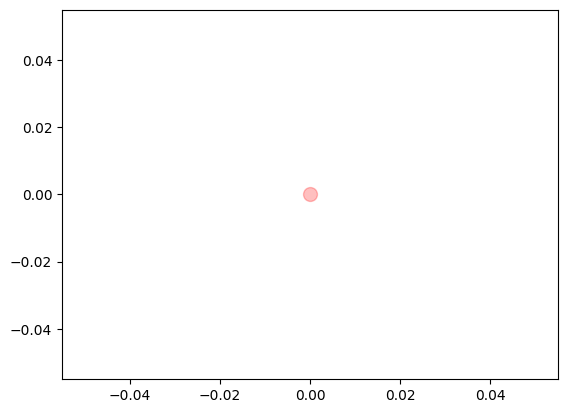

In [11]:
# plot the mean of the data
mean = X.mean(0)
plt.plot(mean[0], mean[1], 'o', markersize=10, color='red', alpha=0.25)

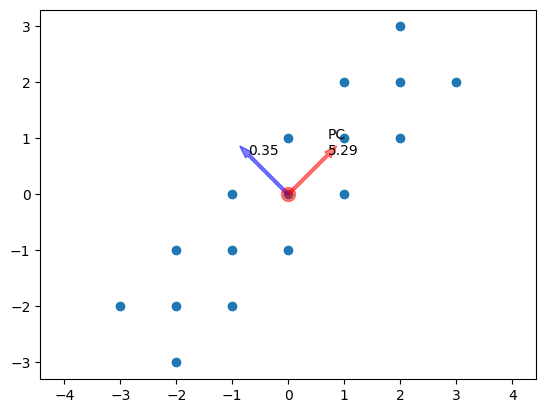

In [12]:
# plot summery

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

mean = X.mean(0)
plt.plot(mean[0], mean[1], 'o', markersize=10, color='red', alpha=0.5)

Sigma = get_covariance(X)
g, l = get_eigen(Sigma)

max_dim = np.argmax(l)

for i in range(l.shape[0]):
    variance = l[i][i]
    value = str(np.round(variance, 2))
    if i == max_dim:
        plt.arrow(mean[0], mean[1], g[0][i], g[1][i], width=0.05, color='red', alpha=0.5)
        plt.annotate(f'PC\n{value}' , [g[0][i], g[1][i]])
    else:
        plt.arrow(mean[0], mean[1], g[0][i], g[1][i], width=0.05, color='blue', alpha=0.5)
        plt.annotate(f'{value}', [g[0][i], g[1][i]])


## Singular Value Decomposition (SVD)

$$
\mathbf{M} = \mathbf{U} \cdot \mathbf{\Sigma} \cdot \mathbf{V}
$$

- $\mathbf{U}$: array[N, D]
    - Left Singular Matrix
- $\mathbf{\Sigma}$: array [D, D]
    - Singular Matrix
- $\mathbf{V}$: array[D, D]
    - Right Singular Matrix

## PCA and SVD
- Relationship
$$\lambda_i = \frac{s_i^2}{N}$$

In [13]:
# Given data
M = np.array([[1, 2], [6, 3], [0, 2]])

N, D = X.shape[0], X.shape[1]

print(f"shape: {M.shape}")
print(f"sample: {N}")
print(f"features: {D}")

for _, m in enumerate(M):
    print(f'    {m}')

shape: (3, 2)
sample: 17
features: 2
    [1 2]
    [6 3]
    [0 2]


Using numpy linalg library
- np.linalg.svd

In [14]:
u, s, v = np.linalg.svd(X)
print(u.shape)
print(s.shape)
print(type(s))
print(s)
print(v.shape)
print(v)

(17, 17)
(2,)
<class 'numpy.ndarray'>
[9.48683298 2.44948974]
(2, 2)
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


[0. 0.]
0


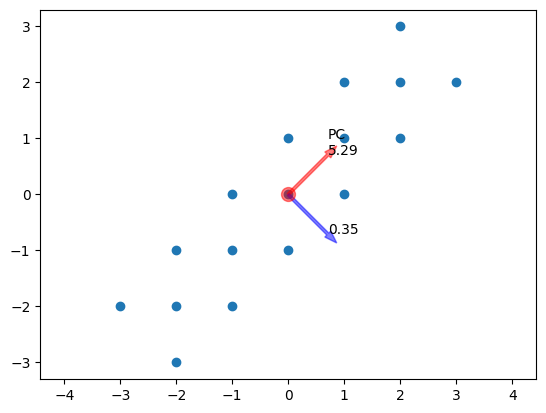

In [15]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

mean = X.mean(0)
print(mean)
plt.plot(mean[0], mean[1], 'o', markersize = 10, color='red', alpha=0.5)

max_dim = np.argmax(s)
print(max_dim)

for i in range(len(s)):
    variance = s[i]**2 / (N)
    value = str(np.round(variance, 2))
    if i == max_dim:
        plt.arrow(mean[0], mean[1], v[i][0], v[i][1], width=0.05, color='red', alpha=0.5)
        plt.annotate(f'PC\n{value}' , [v[i][0], v[i][1]])
    else:
        plt.arrow(mean[0], mean[1], v[i][0], v[i][1], width=0.05, color='blue', alpha=0.5)
        plt.annotate(f'{value}', [v[i][0], v[i][1]])


# Dimensionality reduction 2
## Matrix Factorization
    Non-linear dimensionality reduction

In [16]:
import time
import scipy.sparse as sp
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt
%matplotlib inline

# Recommendation system
- Restaurant recommendation system
- Primary optimization problem
  - [Goal] minimize the reconstruction error
    - Matrix $\mathbf{R}$ completion task
  - Predict the ratings a user will give to a restaurant they have not yet rated based on a latent factor model
  - We are going to factorize the rating matrix by $\mathbf{Q}$ and $\mathbf{P}$ given $\mathbf{R}$
  - Given $\mathbf{R}$
    - $\mathbf{r_{ui}}$ : ratings to item i by user u
- Args
  - $\mathbf{R}$: array[N, D]
    - rating matrix, sparse
  - S={(u, i)|$r_{ui}$ != None} 
- Returns (optimum solution)
  - $\mathbf{Q}$: array[N, K]
    - $\mathbf{q}_u$ : Latent factor for user $u$
  - $\mathbf{P}$: array[K, D]
    - $\mathbf{p}_i$ : Latent factor for item $i$

- Objective function (minimization of reconstruction error)
  - including the regularization term
    - If R is too sparse to reconstruct, 
      - Regularization term becomes __Dominant__
        - push latent factors to the undetermined area (minimize the length)
    - Else,
      - Sum of Squared loss becomes __Dominant__

$$
\mathcal{L} = \min{P, Q}_{\sum{(u, i) \in S}} (R_{ui} - \mathbf{q}_u\mathbf{p}_i^T)^2 + \lambda [\sum_i{\left\lVert \mathbf{p}_i \right\rVert}^2 + \sum_u{\left\lVert \mathbf{q}_u \right\rVert}^2]
$$ 


## How to solve this minimization problem
- Problem to solve
  - We need to optimize __TWO VARIABLES__ {P and Q} at the same time
$$
\mathcal{L} = \min{P, Q}_{\sum{(u, i) \in S}} (R_{ui} - \mathbf{q}_u\mathbf{p}_i^T)^2 + \lambda [\sum_i{\left\lVert \mathbf{p}_i \right\rVert}^2 + \sum_u{\left\lVert \mathbf{q}_u \right\rVert}^2]
$$ 

### Methods
1. Alternating optimization
   - We assume that one of the free parameters is given
   - Optimize the two parameters in turns
2. Stochastic gradient descent (SGD)
   - Sample $\mathbf{r}_{ui}$ (mini-batch)
   - Optimize the parameters by approximating the loss of all data samples with sampled dataset.

## Load and Pre-process the Data

In [17]:
ratings = np.load("yelp-dataset.npy")

## given data interior
## [user_id, restaurant, ratings]
#   [[101968   1880      1]
#   [101968    284      5]
#   [101968   1378      2]
#   ...
#   [ 72452   2100      4]
#   [ 72452   2050      5]
#   [ 74861   3979      5]]

In [18]:
# shape of the rating matrix
# Given matrix is containing the ratings by each user

n_users, n_rests = np.max(ratings[:,0]), np.max(ratings[:, 1])
print(f'#users: {n_users + 1}')
print(f'#items (restaurants): {n_rests + 1}')
print(f'data type: {type(ratings)}')

#users: 337867
#items (restaurants): 5899
data type: <class 'numpy.ndarray'>


In [19]:
# We need to store this matrix as a sparse matrix to avoid out-of-memory issues
R = sp.coo_matrix((ratings[:, 2], (ratings[:, 0], ratings[:, 1])), shape = (n_users+1, n_rests+1)).tocsr()
# R interior
#  (User_id, restaurant), rating
#     (0, 2050)	        5
#     (1, 36)	        1
#     (1, 580)	        5
#     (1, 628)	        5
#     (1, 703)	        1
#     (1, 774)	        5
#     (1, 1303)	        4
#     (1, 2345)	        4
#     (1, 2809)	        5
#     (1, 3870)	        4
#     (1, 4193)	        5
#     (1, 5256)	        5
#     (1, 5344)	        4
#     (1, 5703)	        4
#     (1, 5890)	        5
#     (2, 3694)	        5

## Solution for the cold start problem
- Cold start problem
  - When a new user is coming into the recommendation system, we can not predict about his/her future rating because there is no history
- In preprocessing step
  - We recursively remove all users and restaurants with 10 or less ratings
  - Then, we randomly select 200 data points for the validation and tests sets, respectively
  - After this, we subtract the mean rating for each user to account for this global effects (standardize)


__NOTE__:
  Zero in R is the rating with 0 not the 'unknown' zeros in the matrix. We store the indices for which we are rating data available in a separate variable

In [20]:
def cold_start_preprocessing(matrix, min_entries):
    """
    Recursively removes rows and columns from the input matrix
    which have less ratings than min_entries

    Args:
        matrix: array[n_users, n_items]
            rating data matrix R
        min_entries: int
            minimum entries to be arrowed to exist in the matrix
    
    Returns:
        matrix: sp.spmatrix, shape[N', D']
        The pre-processed matrix -> where N' <= N, D' <= D
    """
    print("shape before: {}".format(matrix.shape))
    print("----------- V -----------")

    shape = (-1, -1)
    while matrix.shape != shape:
        shape = matrix.shape
        # Make stencil buffer (mask) masking more than 0 entries
        nnz = matrix > 0
        # Make stencil buffer masking the row which has less than minimum entries
        # .A1 returns flatten matrix
        row_ixs = nnz.sum(1).A1 > min_entries
        # Only leave out the rows having more than minimum entries
        matrix = matrix[row_ixs]

        # Make stencil buffer masking more than 0 entries
        nnz = matrix > 0
        # Make stencil buffer masking the column which has less than minimum entries
        # .A1 returns flatten matrix
        col_ixs = nnz.sum(0).A1 > min_entries
        # Only leave out the columns having more than minimum entries
        matrix = matrix[:, col_ixs]
    print("shape after: {}".format(matrix.shape))
    nnz = matrix > 0

    assert (nnz.sum(0).A1 > min_entries).all()
    assert (nnz.sum(1).A1 > min_entries).all()

    return matrix


In [21]:
cold_start_preprocessing(R, 10)

shape before: (337867, 5899)
----------- V -----------
shape after: (11275, 3531)


<11275x3531 sparse matrix of type '<class 'numpy.int64'>'
	with 285343 stored elements in Compressed Sparse Row format>

## Subtraction the mean user rating from the sparse rating matrix

In [22]:
dev_mat = cold_start_preprocessing(R, 10)

shape before: (337867, 5899)
----------- V -----------
shape after: (11275, 3531)


In [23]:
n_users, n_rests = dev_mat.shape
print(f'{n_users}, {n_rests}')

11275, 3531


In [24]:
# mean ratings over a user
row = dev_mat.getrow(0)
sum_ratings = row.sum()
num_nnz = row.count_nonzero()

print(f'num_nnz: {num_nnz}')
print(f'sum_ratings: {sum_ratings}')


mean_over_u = np.zeros(n_users)

for u in range(n_users):
    row = dev_mat.getrow(u)
    sum_ratings = row.sum()
    num_nnz = row.count_nonzero()
    mean_user = sum_ratings/num_nnz
    mean_over_u[u] = mean_user

print('mean ratings over a user')
print(mean_over_u)
print(f'shape: {mean_over_u.shape}\n')


# mean ratings over an item\
print('mean ratings over an item')
mean_over_i = dev_mat.mean(0)
print(mean_over_i)
print(f'shape: {mean_over_i.shape}\n')

num_nnz: 13
sum_ratings: 52
mean ratings over a user
[4.         4.4        3.72727273 ... 3.5        4.11764706 2.1       ]
shape: (11275,)

mean ratings over an item
[[0.01800443 0.00381375 0.04399113 ... 0.00629712 0.00700665 0.01649667]]
shape: (1, 3531)



In [25]:
# flatten the mean ratings over a user
f_mou = mean_over_u.flatten()
print(f_mou.shape)

(11275,)


In [26]:
# Standardization
std_mat = dev_mat - f_mou[:, None]
# mean ratings over a user should be close to zero
eps = 1e-10
print(std_mat.mean(1))
assert (std_mat.mean(1).A1 < eps).all()

[[-3.98527329]
 [-4.38130841]
 [-3.71566129]
 ...
 [-3.48810535]
 [-4.09782265]
 [-2.07621071]]


In [27]:
type(dev_mat)

scipy.sparse._csr.csr_matrix

## function 1: Centralization
    for subtraction the man rating per user from the non-zero elements in the input matrix

In [28]:
def centralization(matrix):
    """
    Subtract the mean rating per user from the non-zero elements

    Args:
    matrix: sp.spmatrix, shape [N, D]
            Input sparse matrix

    Retuns:
    matrix: sp.spmatrix, shape[N, D]
            centralized input matrix at 0 (the mean-shifted ones)
    user_means: np.array, shape[N, 1]
                The mean rating per user that can be used to recover the absolute ratings from the mean-shifted ones.
    """
    n_users, n_items = matrix.shape
    print(n_users)
    print(n_items)

    # Create mask of non_zero entries
    nnz_mask = matrix > 0

    # Take mean per user
    # uer_means: matrix [n_users, 1]
    user_means = matrix.sum(1) / nnz_mask.sum(1)
    print(type(user_means))
    print()
    print(user_means.shape)

    # cerate a compressed sparse row matrix(csr_matrix, same type with input matrix
    #  
    subtract_mask = sp.csr_matrix(user_means).multiply(nnz_mask)

    cent_mat = matrix - subtract_mask

#     assert np.all(np.isclose(matrix.mean(1), 0))
    return cent_mat, user_means

In [29]:
cent_mat, user_means = centralization(dev_mat)

11275
3531
<class 'numpy.matrix'>

(11275, 1)


## Split the data into a train, validation and test set

In [30]:
# create train, valid, and test dataset
# create dataloader

# Here we are using sparse matrix, then we need to sample train, valid, and test data samples randomly.

# Configuration
# The number of the valid and test samples

n_validation = 100
n_test = 100

# copy centralized matrix
matrix_cp = cent_mat.copy()
# obtain the index lists which are containing non-zero variable
non_zero_idx = np.argwhere(matrix_cp)

# sample indices randomly (user u, item i)
ixs = np.random.permutation(non_zero_idx)

# obtain u-index list and i-index list as tuple (u, i)
val_idx = tuple(ixs[:n_validation].T)
test_idx = tuple(ixs[n_validation:n_validation + n_test].T)

print(val_idx)
print(test_idx)

# obtain the array (flatten) 
val_values = matrix_cp[val_idx].A1
test_values = matrix_cp[test_idx].A1

# Eliminate valid and test samples and obtain train data.
matrix_cp[val_idx] = matrix_cp[test_idx] = 0
print(matrix_cp.shape)
matrix_cp.eliminate_zeros()


(array([ 9166,   157,  7275,  9043,   287,  8294, 10665, 11037,  7116,
        4360,  4229,  1400,  7209,  6906,  7559,  1891, 10354,  3651,
       10631,  8484,  4994,  9913,  2171, 11218,  7926,  7192,  2373,
       10634, 10600,  7616,  5930, 10550,  4418,    69,  3245, 10533,
        9181,  8294,  8806,  6509,   476,  5210,  4697,  7542,   758,
        9502,  2521,  8703,  6742,  4716,  3109,  5971,  2478,  9391,
        2790,  7807,  3670,  2987,  6697, 10015,  7938,  4222,  6971,
       10663,  1082,  1111,  1995,  6543,  4019,  6147,  6029,  5941,
         156,  3113,  8706,  2269,  4144,  7923,  2234,  8026,  1764,
        9859,  1221,  6059,  1426, 10751,  6784,  8615,  9592,  5378,
        7287,  5469,  5678,  5029,  8443,   543,  3246,  7784,  4239,
       10013], dtype=int32), array([1562, 3342, 2977,  430,  528,  459, 1967, 1428,   91, 3200, 2221,
        775, 3168, 1442, 1005, 2672, 3447,  224, 1753, 1154, 1303, 2414,
       1311, 3029, 3069, 2545, 2012, 2020, 1039, 1340,

In [31]:
for t, train in enumerate(matrix_cp):
    if t > 0:
        break
    print('train sample')
    print(train)
    print('valid sample')
    print(f'({val_idx[0][t]}, {val_idx[1][t]}):{val_values[t]}')
    print('test sample')
    print(f'({test_idx[0][t]}, {test_idx[1][t]}):{test_values[t]}')

train sample
  (0, 3526)	1.0
  (0, 3120)	1.0
  (0, 2508)	1.0
  (0, 1694)	1.0
  (0, 461)	1.0
  (0, 416)	-3.0
  (0, 368)	1.0
  (0, 22)	-3.0
valid sample
(9166, 1562):0.3125
test sample
(1951, 540):0.02499999999999991


### Function 2: split the centralized data into train, valid, and test

In [32]:
def split_data(matrix, n_val, n_test):
    """
    Extract validation and test entries from the input matrix

    Args:
        matrix: sp.spmatrix, shape [N, D]
                The input data matrix
        n_val:  int
                The number of validation entries to extract
        n_test: int
                The number fo test entries to extract
        
    Returns:
        matrix_split:   sp.spmatrix, shape [N, D]
                        a copy of the input matrix in which the validation and 

        val_idx:        tuple, shape [2, n_val]
                        The indices of the validation entries

        test_idx:       tuple, shape [2, n_test]
                        The indices of the test entries

        val_values:     np.array, shape [n_val]
                        The values of the input matrix at the validation indices

        test_values:    np.array, shape [n_train]
                        The values of the input matrix at the test indices
    """

    # copy the input matrix
    matrix_cp = matrix.copy()

    # obtain indices pair (User u, Item i)
    non_zero_idx = np.argwhere(matrix_cp)

    # random permutation of the list of indices pair
    ixs = np.random.permutation(non_zero_idx)

    # obtain a tuple [n_val, 2] for u and i, respectively
    val_idx =tuple(ixs[:n_val].T)
    test_idx = tuple(ixs[n_val:n_val + n_test].T)

    # obtain the ratings for the validation data
    val_values = matrix_cp[val_idx].A1

    # obtain the ratings for the test data
    test_values = matrix_cp[test_idx].A1

    # Set zero to entries which are assigned as valid or test data
    matrix_cp[val_idx] = matrix_cp[test_idx] = 0

    # Eliminate zero entries
    matrix_cp.eliminate_zeros()

    return matrix_cp, val_idx, test_idx, val_values, test_values

In [33]:
dev_mat = cold_start_preprocessing(R, 20)

shape before: (337867, 5899)
----------- V -----------
shape after: (3529, 2072)


In [34]:
n_val = 200
n_test = 200
# split data
R_train, val_idx, test_idx, val_values, test_values = split_data(dev_mat, n_val, n_test)

In [35]:
# Centralization
non_zero_indices = np.argwhere(R_train)
R_shifted, user_means = centralization(R_train)

# Apply the same shift to the validation and test data
val_values_shifted = val_values - np.ravel(user_means[np.array(val_idx).T[:, 0]])
test_values_shifted = test_values - np.ravel(user_means[np.array(test_idx).T[:, 0]])

3529
2072
<class 'numpy.matrix'>

(3529, 1)


In [36]:
def loss(values, ixs, Q, P, reg_lambda):
    """
    Compute the loss of the latent factor model (at indices ixs)

    Args:
        values (list of R_ui): np.array, shape[n_ixs, ]
                The array with the ground-truth values
        ixs (list of ui itself):    tuple, shape[2, n_ixs]
                The indices at which we want to evaluate the loss(usually the nonzero indices of the unshifted data matrix)
        Q:  np.array, shape [N. k]
            The matrix Q of a latent factor model
        P:  np.array, shape [k, D]
            The matrix P of a latent factor model
        reg_lambda: float
            The regulation strength
    
    Returns:
        loss:   float
                The loss of the latent factor model
    """

    # mean of sum of squared error
    sse_loss = np.sum((values - Q.dot(P)[ixs])**2)
    # regularization term 
    regularization_loss = reg_lambda * (np.sum(np.linalg.norm(P, axis = 0)**2) + np,sum(np.linalg.norm(Q, axis = 0)**2))

    return sse_loss + regularization_loss

## Initialization of the Q and P for optimization

In [37]:
print(R_train.shape)
N, D = R_train.shape
k = D
Q = np.random.rand(N, k)
print(type(Q))
print(Q.shape)
P = np.random.rand(k, D)
print(type(P))
print(P.shape)

(3529, 2072)
<class 'numpy.ndarray'>
(3529, 2072)
<class 'numpy.ndarray'>
(2072, 2072)


In [38]:
f_R_train = R_train.astype(float)
print(f_R_train.shape)
print(type(f_R_train))
print(f_R_train)
print(k)

(3529, 2072)
<class 'scipy.sparse._csr.csr_matrix'>
  (0, 24)	3.0
  (0, 219)	4.0
  (0, 333)	2.0
  (0, 344)	3.0
  (0, 393)	5.0
  (0, 470)	4.0
  (0, 530)	5.0
  (0, 570)	3.0
  (0, 585)	3.0
  (0, 657)	4.0
  (0, 664)	4.0
  (0, 711)	5.0
  (0, 799)	4.0
  (0, 825)	3.0
  (0, 872)	4.0
  (0, 1069)	4.0
  (0, 1120)	5.0
  (0, 1188)	5.0
  (0, 1323)	4.0
  (0, 1627)	2.0
  (0, 1648)	4.0
  (0, 1768)	4.0
  (0, 1865)	4.0
  (0, 1946)	2.0
  (1, 280)	5.0
  :	:
  (3528, 735)	2.0
  (3528, 795)	1.0
  (3528, 818)	1.0
  (3528, 839)	4.0
  (3528, 899)	4.0
  (3528, 936)	1.0
  (3528, 1001)	2.0
  (3528, 1005)	1.0
  (3528, 1070)	4.0
  (3528, 1130)	2.0
  (3528, 1144)	2.0
  (3528, 1170)	2.0
  (3528, 1175)	2.0
  (3528, 1215)	2.0
  (3528, 1252)	2.0
  (3528, 1332)	3.0
  (3528, 1363)	1.0
  (3528, 1395)	3.0
  (3528, 1682)	3.0
  (3528, 1685)	4.0
  (3528, 1689)	2.0
  (3528, 1798)	1.0
  (3528, 1945)	5.0
  (3528, 1954)	4.0
  (3528, 1998)	1.0
2072


In [39]:
# When we use svds function from the scipy.sparse.linalg, we need to set k as following
# `k` must be an integer satisfying `0 < k < min(A.shape)`.
U, s, V = svds(f_R_train, k=100)
S = np.diag(s)
Q = U.dot(S)
P = V

In [40]:
print(U.shape)
print(s.shape)
print(V.shape)

(3529, 100)
(100,)
(100, 2072)


In [41]:
S = np.diag(s)
Q = U.dot(S)
print(Q.shape)
P = V
print(P.shape)

(3529, 100)
(100, 2072)


In [42]:
R_train.dtype

dtype('int64')

### Function that initialize the latent factors Q and P


In [43]:
def initialize_Q_P(matrix, k, init = 'random'):
    """
    Initialize the matrices Q and P for a latent factor model
    Initialize them by using SVD or random

    Args:
        matrix: sp.spmatrix, shape [N, D]
                The matrix to be factorized
        k:      int
                The number of latent dimension
        init:   str in ['svd', 'random'], default:'random'
                The initialization strategy. 'svd' means that we use SVD to initialize P and Q
                'random' means we initialize the entries in P and Q randomly in the interval [0. 1)
                -> numpy.random.rand(shape)
    Returns:
        Q:  np.print(U.shape)
            The initialized matrix Q of a latent factor model
        P:  np.array, shape[k, D]
            The initialized matrix P of a latent factor model
    """ 

    N, D = matrix.shape

    np.random.seed(0)

    if matrix.dtype != float:
        matrix = matrix.astype(float)

    if init=='random':
        Q = np.random.rand((N, k))
        P = np.random.rand((k, D))
    elif init=='svd':
        U, s, V = svds(matrix, k=k)
        S = np.diag(s)
        Q = U.dot(S)
        P = V
    else:
        raise ValueError
    
    assert Q.shape == (N, k)
    assert P.shape == (k, D)
    return Q, P

In [45]:
Q, P = initialize_Q_P(R_train, k = 100, init='svd')

In [46]:
print(f'{Q.shape}')
print(f'{P.shape}')

(3529, 100)
(100, 2072)


## Optimization
- Alternating optimization
    - We need to optimize Q and P simultaneously in the primary optimization problem
    - But this is really difficult to implement
    - We are going to pretend knowing either Q or P at a moment and optimize the other variable


In [64]:
row  = np.array([0, 0, 1, 3])
col  = np.array([0, 2, 1, 3])
data = np.array([1, 1, 1, 1])

A = sp.coo_matrix((data, (row, col)), shape=(4, 4)).tocsr()
print(A.toarray())
print(A)
list_rows = A.tolil().rows
print('=list=')
print(list_rows)

print('---------------------------')

A = A.tocsc()
print(A.toarray())
print(A)
list_colums = A.tolil().rows
print('=list=')
print(list_colums)



[[1 0 1 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]]
  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (3, 3)	1
=list=
[list([0, 2]) list([1]) list([]) list([3])]
---------------------------
[[1 0 1 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]]
  (0, 0)	1
  (1, 1)	1
  (0, 2)	1
  (3, 3)	1
=list=
[list([0, 2]) list([1]) list([]) list([3])]


## Scipy sparse 
    csc vs csr
- CSC: Compressed sparse column
  - Sorted in the column indices 
- CSR: Compressed sparse row
  - Sorted in the row indices 
They are used for write-once-read-many-tasks


In [70]:
def latent_factor_alternating_optimization(R, non_zero_idx, k, val_idx, reg_lambda, max_steps = 100, init = 'random', log_every = 1, patience = 5, eval_every = 1, optimizer = 'sgd', lr = 1e-2):
    """
    Perform matrix factorization using alternating optimization. 
    Training is done via patience.
    i.e. we stop training after we observe no improvement 
    on the validation loss for a certain
    amount of training steps. We then return the best values 
    for Q and P observed during training.
    
    Args:
        R:              sp.spmatrix, shape [N, D]
                        The input matrix to be factorized (train_matrix)
                        It has to be centralized by mean.
        
        non_zero_idx:   np.array, shape [nnz, 2]
                        The indices of the non-zero entries of the **un-shifted** matrix to be factorized.
                        nnz refers to the number of non-zero entries. Note that this may be different 
                        from the number of non-zero entries in the input matrix(training matrix) since this indices refers
                        original data matrix
        
        k:              int
                        The latent factor dimension
        
        val_idx:        tuple, shape[2, n_val]
                        [u1, u2, ,,,,, u_n_val]
                        [i1, i2, ,,,,, i_n_val]
                        Tuple pf the validation set indices
                        n_val refers to the size of the validation set
        
        val_values:     np.array, shape [n_val, ]
                        The values in the validation set

        reg_lambda:     float
                        The regularization strength
        
        max_steps:      int, optional, default = 100
                        Maximum number of training interactions (steps, 1 steps, one optimization of two matrix factor Q and P),
                        Note that we will step early if we observe
                        no improvement on the validation with the step to be patient

        init:           str in ['random', 'svd'], default 'random'
                        The initialization strategy for P and Q.
        
        log_every:      int, optional, default: 1
                        Log the training status every X iterations
        
        patience:       int, optional, default: 5
                        Stop training after we observe no improvement of the valid loss for X evaluation
                        iterations. After we stop training, we restore the best observed values for Q and P

        eval_every:     int, optional, default: 1
                        Evaluate the training and validation loss every x steps
                        If we observe no improvement of the validation error, we decrease out patience by 1, else we reset it to *patience*
        
        optimizer:      str, optional, default: sgd
                        If 'sgd; stochastic gradient descent shall be used, otherwise, use alternating least squares.
        
    Returns:

        best_Q:             np.array, shape [N, k]
                            Best value for Q (based on the validation loss) observed during training
        
        best_P:             np.array, shape[k, D]
                            Best value for P (based on validation loss) observed during training

        validation_losses:  list of floats
                            Validation loss for every evaluation iteration, can be used for plotting the validation loss
                            over time
        
        train_losses:       list of floats
                            Training loss for every evaluation iteration, can be used for plotting the training loss over time

        converged_after:    int
                            it - patience * eval_every, where it is the iteration in which patience hits 0,
                            or -1 if we hit max_steps before converging.

    """

    nnz_mask = sp.coo_matrix((np.ones(len(non_zero_idx)), (non_zero_idx[:, 0], non_zero_idx[:, 1])), shape=R.shape, dtype = "unit8").tocsr()

    nnz_mask_col = nnz_mask.tocsc()

    cols = nnz_mask.T.tolil().rows
    rows = nnz_mask.tolil().rows

    reg  = Ridge(alpha=reg_lambda, fit_intercept = False)

    Q, P = initialize_Q_P(R, k, init)
    train_losses = []
    validation_losses = []

    best_val_losses = best_Q = best_P = converged_after = -1

    train_idx = tuple(non_zero_idx.T)

    bef = -1
    times = []
    for it in range(max_steps):
        if bef != -1:
            times.append(time.time()-bef)
        bef = time.time()

        if it % eval_every ==0:
            train_loss = loss(R[train_idx].A1, train_idx, Q, P, reg_lambda)
            train_losses.append(train_loss)

            val_loss = loss(val_values, val_idx, Q, P, reg_lambda)
            validation_losses.append(val_loss)

            if best_val_loss < 0 or val_loss < best_val_loss:
                best_val_loss = val_loss
                best_Q = Q
                best_P = P
                current_patience = patience
            else:
                current_patience -=1

            if current_patience ==0:
                converged_after = it - patience * eval_every
                break

        print("Iteration {}, training loss: {:.3f}, validation loss: {:.3f}".format(it, train_loss, val_loss))

        if optimizer == 'sgd':
            sgd_indices = np.arrange(len(train_idx[0]))
            np.random.shuffle(sgd_indices)

            for idx in sgd_indices:
                u, i = train_idx[0][idx], train_idx[1][idx]
                prediction=Q[u, :].dot(P[:, i])
                e = (R[u, i] - prediction) # error

                # Update latent factors
                Q[u, :] += lr * (e * P[:, i]-reg_lambda * Q[u, :])
                P[:, i] += lr * (e * Q[u, :]-reg_lambda * P[:, i])

        else:
            # fix Q and update P
            for rating_idx in range(R.shape[1]):
                nnz_idx = cols[rating_idx]
                res = reg.fit(Q[nnz_idx], np.squeeze(R[nnz_idx, rating_idx].toarray()))
                P[:, rating_idx] = res.coef_

            for user_idx in range(R.shape[0]):
                 nnz_idx = rows[user_idx]
                 res = reg.fit(P[:, nnz_idx].T, np.squeeze(R[user_idx, nnz_idx].toarray()))
                 Q[user_idx, :] = res.coef_
            
        print("Converged after {} iteration, ob average {:.3f}s per iteration".format(converged_after, np.mean(times)))
    return best_Q, best_P, validation_losses, train_losses, converged_after